In [1]:
pip install imbalanced-Learn

Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [2]:
import pandas as pd
import numpy 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
df=pd.read_csv(r"Datasets/Data_u.csv")

C:\Users\vsneg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,sport,dport,pkts,bytes,seq,dur,mean,stddev,sum,min,...,srate,drate,attack,category,subcategory,proto,saddr,daddr,state,record
0,138,138,4,986,15,1080.37891,0.00000,0.00000,0.00000,0.00000,...,0.00278,0.00000,0,Normal,Normal,3,11,18,4,2
1,60864,443,12,1053,12,112.04757,0.02427,0.01594,0.07281,0.00579,...,0.06247,0.02677,0,Normal,Normal,2,6,8,3,2
2,138,138,4,1086,23,731.27210,0.00010,0.00000,0.00021,0.00010,...,0.00410,0.00000,0,Normal,Normal,3,12,18,4,2
3,36682,22,28,5098,30,0.48960,0.48960,0.00000,0.48960,0.48960,...,24.50990,28.59489,1,Theft,Data_Exfiltration,2,4,19,3,2
4,36684,22,31,5472,31,3.20705,3.20705,0.00000,3.20705,3.20705,...,4.05358,4.98902,1,Theft,Data_Exfiltration,2,4,19,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151178,51760,3306,13,1113,20596,0.19769,0.19769,0.00000,0.19769,0.19769,...,30.35009,25.29174,1,Reconnaissance,Service_Scan,2,4,19,3,2
151179,34720,3306,13,1113,20597,0.19811,0.19811,0.00000,0.19811,0.19811,...,30.28651,25.23876,1,Reconnaissance,Service_Scan,2,3,19,3,2
151180,37616,3306,13,1113,20598,0.19890,0.19890,0.00000,0.19890,0.19890,...,30.16652,25.13877,1,Reconnaissance,Service_Scan,2,2,19,3,2
151181,46406,3306,13,1113,20599,0.19804,0.19804,0.00000,0.19804,0.19804,...,30.29752,25.24793,1,Reconnaissance,Service_Scan,2,1,19,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151183 entries, 0 to 151182
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sport        151183 non-null  object 
 1   dport        151183 non-null  object 
 2   pkts         151183 non-null  int64  
 3   bytes        151183 non-null  int64  
 4   seq          151183 non-null  int64  
 5   dur          151183 non-null  float64
 6   mean         151183 non-null  float64
 7   stddev       151183 non-null  float64
 8   sum          151183 non-null  float64
 9   min          151183 non-null  float64
 10  max          151183 non-null  float64
 11  spkts        151183 non-null  int64  
 12  dpkts        151183 non-null  int64  
 13  sbytes       151183 non-null  int64  
 14  dbytes       151183 non-null  int64  
 15  rate         151183 non-null  float64
 16  srate        151183 non-null  float64
 17  drate        151183 non-null  float64
 18  attack       151183 non-

In [6]:
df.drop(['attack', 'subcategory','sport','dport'], axis=1, inplace=True)

In [7]:
df

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,category,proto,saddr,daddr,state,record
0,4,986,15,1080.37891,0.00000,0.00000,0.00000,0.00000,0.00000,4,...,0,0.00278,0.00278,0.00000,Normal,3,11,18,4,2
1,12,1053,12,112.04757,0.02427,0.01594,0.07281,0.00579,0.04468,8,...,356,0.09817,0.06247,0.02677,Normal,2,6,8,3,2
2,4,1086,23,731.27210,0.00010,0.00000,0.00021,0.00010,0.00011,4,...,0,0.00410,0.00410,0.00000,Normal,3,12,18,4,2
3,28,5098,30,0.48960,0.48960,0.00000,0.48960,0.48960,0.48960,13,...,3458,55.14728,24.50990,28.59489,Theft,2,4,19,3,2
4,31,5472,31,3.20705,3.20705,0.00000,3.20705,3.20705,3.20705,14,...,3670,9.35441,4.05358,4.98902,Theft,2,4,19,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151178,13,1113,20596,0.19769,0.19769,0.00000,0.19769,0.19769,0.19769,7,...,581,60.70018,30.35009,25.29174,Reconnaissance,2,4,19,3,2
151179,13,1113,20597,0.19811,0.19811,0.00000,0.19811,0.19811,0.19811,7,...,581,60.57302,30.28651,25.23876,Reconnaissance,2,3,19,3,2
151180,13,1113,20598,0.19890,0.19890,0.00000,0.19890,0.19890,0.19890,7,...,581,60.33304,30.16652,25.13877,Reconnaissance,2,2,19,3,2
151181,13,1113,20599,0.19804,0.19804,0.00000,0.19804,0.19804,0.19804,7,...,581,60.59504,30.29752,25.24793,Reconnaissance,2,1,19,3,2


<AxesSubplot:xlabel='category', ylabel='count'>

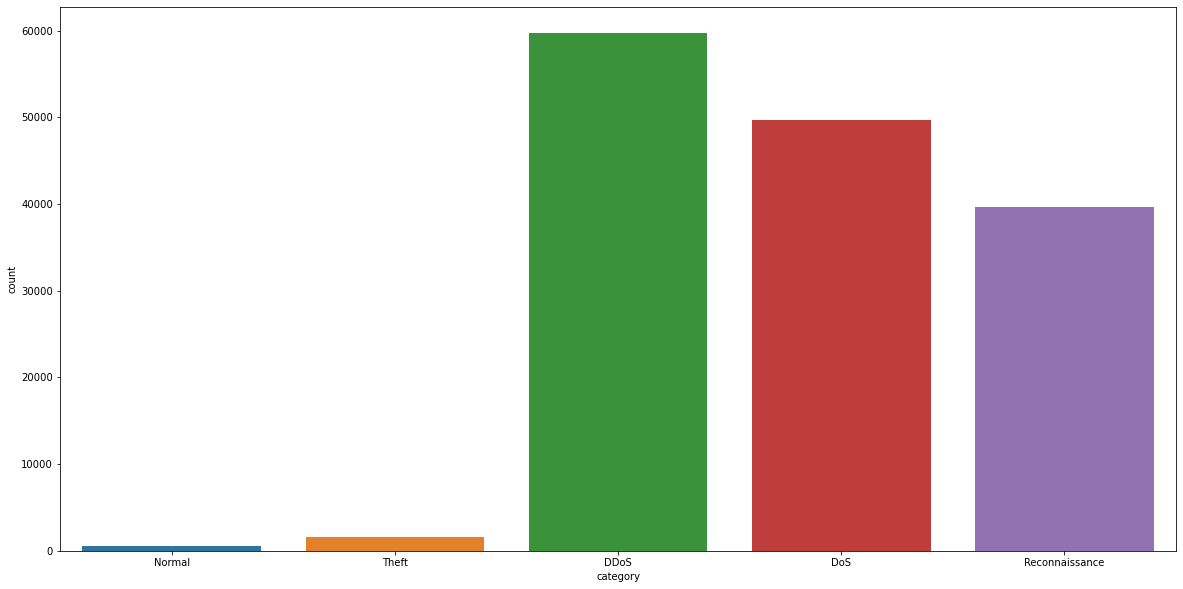

In [8]:
fig_dim=(20,10)
fig,ax=plt.subplots(figsize=fig_dim)
sns.countplot(x="category",data=df,ax=ax)

## Label Encoding

In [9]:
le = preprocessing.LabelEncoder()
df['category'] = le.fit_transform(df.category.values)

In [10]:
X=df.drop(["category"], axis="columns")
Y=df["category"]

## Over-sampling (SMOTE)

In [11]:
oversample = SMOTE()
x_sm,y_sm = oversample.fit_resample(X, Y)

In [12]:
y_sm.value_counts()

2    59719
4    59719
0    59719
1    59719
3    59719
Name: category, dtype: int64

In [13]:
df = pd.concat([x_sm, y_sm], axis=1, join='inner')

In [14]:
df

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,proto,saddr,daddr,state,record,category
0,4,986,15,1080.378910,0.000000,0.000000,0.000000,0.000000,0.000000,4,...,0,0.002780,0.002780,0.000000,3,11,18,4,2,2
1,12,1053,12,112.047570,0.024270,0.015940,0.072810,0.005790,0.044680,8,...,356,0.098170,0.062470,0.026770,2,6,8,3,2,2
2,4,1086,23,731.272100,0.000100,0.000000,0.000210,0.000100,0.000110,4,...,0,0.004100,0.004100,0.000000,3,12,18,4,2,2
3,28,5098,30,0.489600,0.489600,0.000000,0.489600,0.489600,0.489600,13,...,3458,55.147280,24.509900,28.594890,2,4,19,3,2,4
4,31,5472,31,3.207050,3.207050,0.000000,3.207050,3.207050,3.207050,14,...,3670,9.354410,4.053580,4.989020,2,4,19,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298590,10,4875,272,0.041745,0.041745,0.000000,0.041745,0.041745,0.041745,6,...,266,215.615087,119.786158,71.871690,2,3,24,8,2,4
298591,2,134,76,0.000190,0.000190,0.000000,0.000190,0.000190,0.000190,1,...,60,5360.834801,0.000000,0.000000,2,6,16,8,2,4
298592,31,5488,154,2.484250,2.484250,0.000000,2.484250,2.484250,2.484250,15,...,3604,12.083288,5.638871,6.041639,2,4,19,3,2,4
298593,86023,351411728,165,527.236914,4.287482,1.058278,170.456386,0.429481,4.998791,69836,...,2032568,155.306310,126.062418,29.241956,2,6,16,2,2,4


In [15]:
X=df.drop(["category"], axis="columns")
Y=df["category"]

# Considering the best 10 features through Feature Selection(SelectKBest)

## Feature Selection

In [16]:
fs = SelectKBest(score_func=f_classif, k=10)
fs.fit(X, Y)

SelectKBest()

# Top 10 features for the model 

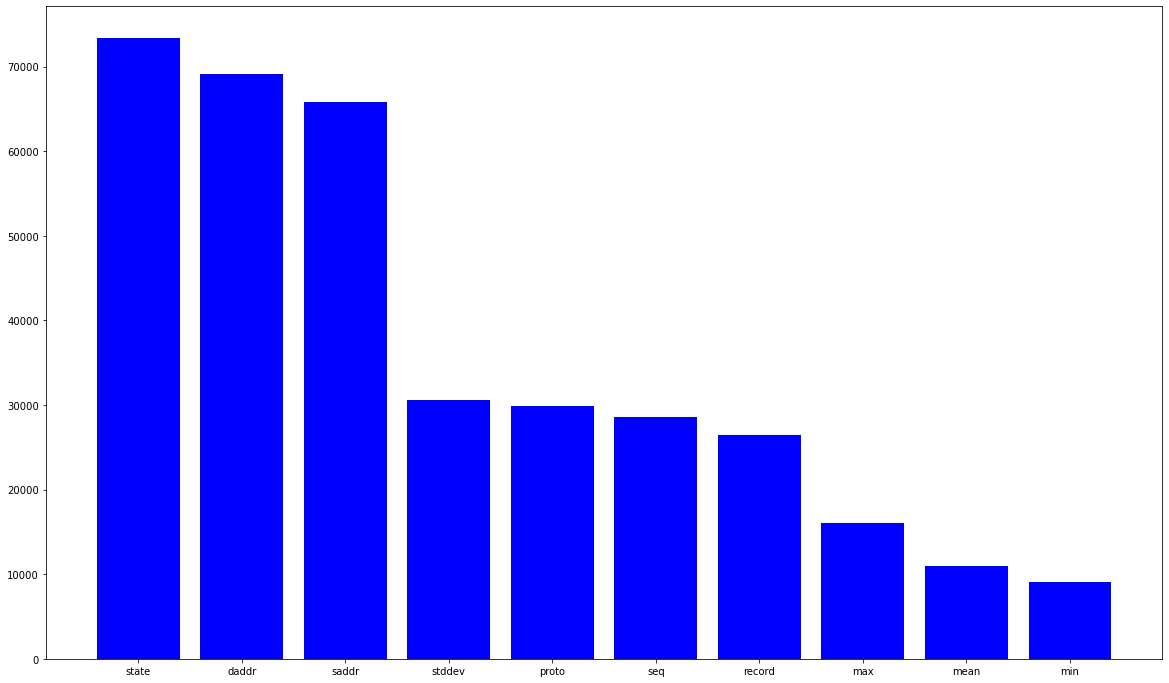

In [17]:
index = np.argsort(fs.scores_)[::-1]

features = []
for i in range(10):
    features.append(df.columns[index[i]])

plt.figure(figsize=(20,12))
plt.bar(features, fs.scores_[index[range(10)]], color='b', align='center')
plt.show()

In [18]:
cols = fs.get_support(indices=True)
df1 = df.iloc[:,cols]

In [19]:
df1["category"]=df["category"]

C:\Users\vsneg\AppData\Local\Temp/ipykernel_18276/1109136779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["category"]=df["category"]


## Correlation of each column

In [20]:
df1.corr()

,seq,mean,stddev,min,max,proto,saddr,daddr,state,record,category
seq,1.000000,0.043208,0.068365,0.074801,0.054493,0.159633,-0.229592,0.019730,-0.049697,-0.128995,-0.289084
mean,0.043208,1.000000,0.544571,0.761398,0.966088,0.303897,-0.128806,-0.123228,-0.383435,-0.659795,-0.317626
stddev,0.068365,0.544571,1.000000,0.035582,0.721666,0.313911,-0.297708,-0.082038,-0.208956,-0.326841,-0.400093
min,0.074801,0.761398,0.035582,1.000000,0.657610,0.178952,-0.088700,-0.093396,-0.244269,-0.655908,-0.170596
max,0.054493,0.966088,0.721666,0.657610,1.000000,0.317715,-0.190226,-0.124491,-0.358530,-0.627769,-0.377710
proto,0.159633,0.303897,0.313911,0.178952,0.317715,1.000000,-0.067544,0.377091,-0.683091,-0.308775,-0.274421
saddr,-0.229592,-0.128806,-0.297708,-0.088700,-0.190226,-0.067544,1.000000,0.144497,-0.117720,0.198003,0.393433
daddr,0.019730,-0.123228,-0.082038,-0.093396,-0.124491,0.377091,0.144497,1.000000,-0.521540,0.091821,-0.053445
state,-0.049697,-0.383435,-0.208956,-0.244269,-0.358530,-0.683091,-0.117720,-0.521540,1.000000,0.194234,0.195946
record,-0.128995,-0.659795,-0.326841,-0.655908,-0.627769,-0.308775,0.198003,0.091821,0.194234,1.000000,0.366072


In [21]:
corr_matrix=df1.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

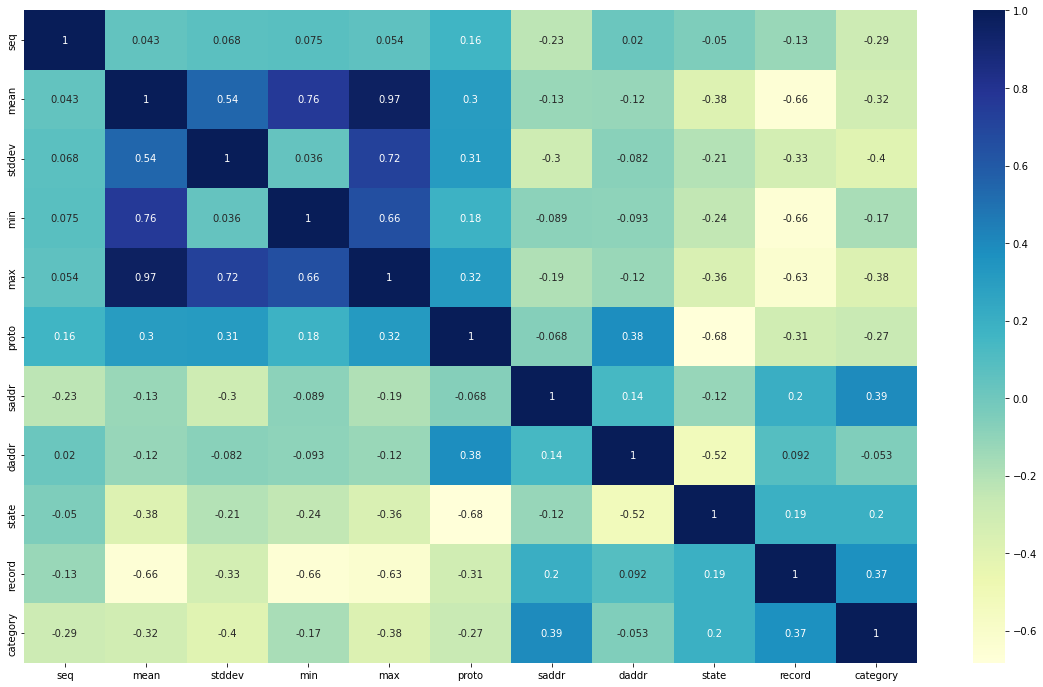

In [22]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [23]:
X=df1.drop(["category"], axis="columns")
Y=df1["category"]

## Train-Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [25]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [26]:
scaler_new = StandardScaler()
X = scaler_new.fit_transform(X)

In [27]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [28]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
top10_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [29]:
algorithm.append("Logistic Regression")

In [30]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [31]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [32]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

In [33]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [34]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

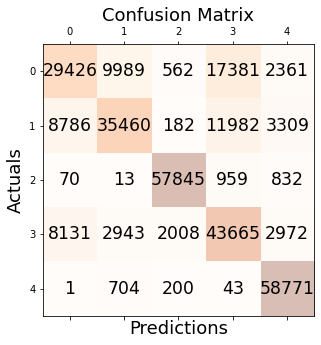

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [36]:
algorithm.append("Decision Tree")

In [37]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [38]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [39]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [40]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [41]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

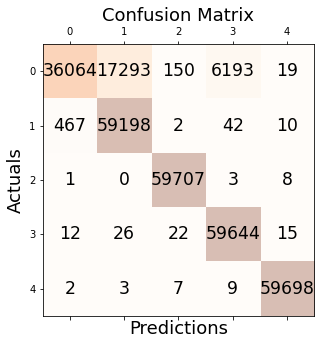

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [43]:
algorithm.append("Random Forest")

In [44]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [45]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [46]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [47]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [48]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

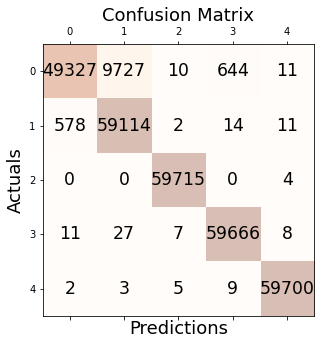

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [50]:
algorithm.append("KNN")

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [52]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [53]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [54]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [55]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

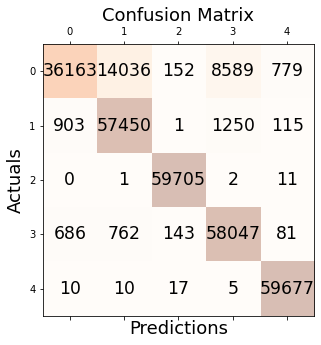

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [57]:
top10_df["Algorithms"]=algorithm
top10_df["Precision"]=precision
top10_df["Recall"]=recall
top10_df["Accuracy"]=accuracy
top10_df["F1-Score"]=f1
top10_df["Error Rate"]=error

In [58]:
top10_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.757816,0.754092,0.754090,0.736844,0.245912
1,Decision Tree,0.942393,0.918674,0.918673,0.908325,0.081328
2,Random Forest,0.972965,0.962917,0.962917,0.959725,0.037084
3,KNN,0.925004,0.907726,0.907725,0.897054,0.092275


<AxesSubplot:xlabel='Algorithms'>

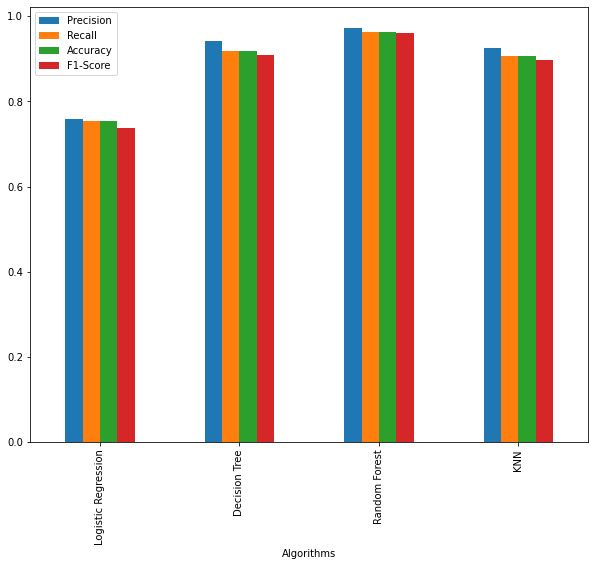

In [59]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top10_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

## ANN

In [60]:
algorithm.append("ANN")

In [61]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
6532/6532 [==============================] - 6s 722us/step - loss: 0.4784 - accuracy: 0.8020
Epoch 2/10
6532/6532 [==============================] - 5s 786us/step - loss: 0.3595 - accuracy: 0.8459
Epoch 3/10
6532/6532 [==============================] - 5s 733us/step - loss: 0.3178 - accuracy: 0.8676
Epoch 4/10
6532/6532 [==============================] - 5s 732us/step - loss: 0.2908 - accuracy: 0.8858
Epoch 5/10
6532/6532 [==============================] - 5s 755us/step - loss: 0.2669 - accuracy: 0.9011
Epoch 6/10
6532/6532 [==============================] - 5s 746us/step - loss: 0.2473 - accuracy: 0.9089
Epoch 7/10
6532/6532 [==============================] - 5s 724us/step - loss: 0.2325 - accuracy: 0.9136
Epoch 8/10
6532/6532 [==============================] - 5s 751us/step - loss: 0.2223 - accuracy: 0.9175
Epoch 9/10
6532/6532 [==============================] - 5s 739us/step - loss: 0.2149 - accuracy: 0.9197
Epoch 10/10
6532/6532 [==============================] - 5s 729u

In [63]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [64]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [65]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

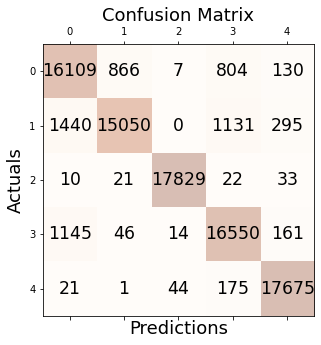

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [67]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [68]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
top10_df = pd.DataFrame(columns = column_names)

In [69]:
top10_df["Algorithms"]=algorithm
top10_df["Precision"]=precision
top10_df["Recall"]=recall
top10_df["Accuracy"]=accuracy
top10_df["F1-Score"]=f1
top10_df["Error Rate"]=error

In [70]:
top10_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.757816,0.754092,0.754090,0.736844,0.245912
1,Decision Tree,0.942393,0.918674,0.918673,0.908325,0.081328
2,Random Forest,0.972965,0.962917,0.962917,0.959725,0.037084
3,KNN,0.925004,0.907726,0.907725,0.897054,0.092275
4,ANN,0.930054,0.928935,0.928934,0.928730,0.071066


<AxesSubplot:xlabel='Algorithms'>

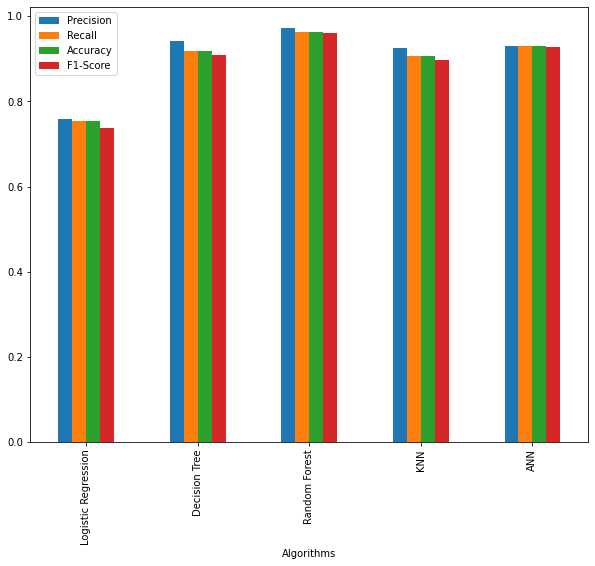

In [71]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top10_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# Considering the best 15 features through Feature Selection(SelectKBest)

In [72]:
X=df.drop(["category"], axis="columns")
Y=df["category"]

## Feature Selection

In [73]:
fs = SelectKBest(score_func=f_classif, k=15)
fs.fit(X, Y)

SelectKBest(k=15)

# Top 15 features for the model 

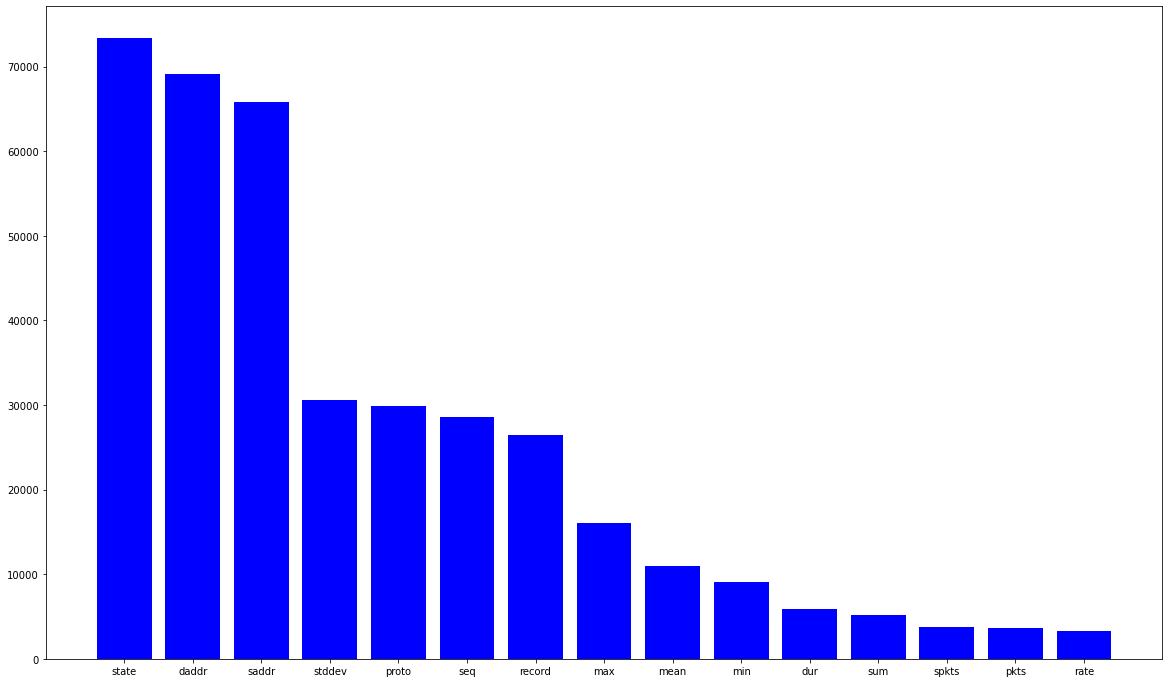

In [74]:
index = np.argsort(fs.scores_)[::-1]

features = []
for i in range(15):
    features.append(df.columns[index[i]])

plt.figure(figsize=(20,12))
plt.bar(features, fs.scores_[index[range(15)]], color='b', align='center')
plt.show()

In [75]:
cols = fs.get_support(indices=True)
df2 = df.iloc[:,cols]

In [76]:
df2["category"]=df["category"]

C:\Users\vsneg\AppData\Local\Temp/ipykernel_18276/1701276486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["category"]=df["category"]


## Correlation of each column

In [77]:
df2.corr()

,pkts,seq,dur,mean,stddev,sum,min,max,spkts,rate,proto,saddr,daddr,state,record,category
pkts,1.000000,-0.111851,0.748586,0.353378,0.018340,0.754252,0.084555,0.282214,0.945414,-0.017634,-0.018465,0.171138,-0.033862,-0.178670,0.025683,0.002755
seq,-0.111851,1.000000,-0.136008,0.043208,0.068365,-0.127235,0.074801,0.054493,-0.113048,-0.023574,0.159633,-0.229592,0.019730,-0.049697,-0.128995,-0.289084
dur,0.748586,-0.136008,1.000000,0.376413,0.067193,0.913190,0.060369,0.319434,0.774550,-0.030975,-0.027607,0.226659,-0.043600,-0.223763,0.030886,-0.034205
mean,0.353378,0.043208,0.376413,1.000000,0.544571,0.413612,0.761398,0.966088,0.357675,-0.085187,0.303897,-0.128806,-0.123228,-0.383435,-0.659795,-0.317626
stddev,0.018340,0.068365,0.067193,0.544571,1.000000,0.053988,0.035582,0.721666,0.018069,-0.079287,0.313911,-0.297708,-0.082038,-0.208956,-0.326841,-0.400093
sum,0.754252,-0.127235,0.913190,0.413612,0.053988,1.000000,0.079898,0.341859,0.826516,-0.021952,-0.030716,0.209800,-0.035517,-0.206879,0.015933,-0.006203
min,0.084555,0.074801,0.060369,0.761398,0.035582,0.079898,1.000000,0.657610,0.072258,-0.053278,0.178952,-0.088700,-0.093396,-0.244269,-0.655908,-0.170596
max,0.282214,0.054493,0.319434,0.966088,0.721666,0.341859,0.657610,1.000000,0.285442,-0.093043,0.317715,-0.190226,-0.124491,-0.358530,-0.627769,-0.377710
spkts,0.945414,-0.113048,0.774550,0.357675,0.018069,0.826516,0.072258,0.285442,1.000000,-0.017875,-0.022676,0.180799,-0.034795,-0.174539,0.025656,0.001954
rate,-0.017634,-0.023574,-0.030975,-0.085187,-0.079287,-0.021952,-0.053278,-0.093043,-0.017875,1.000000,-0.083145,-0.003265,-0.063313,0.116988,0.045827,0.142834


In [78]:
corr_matrix=df2.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

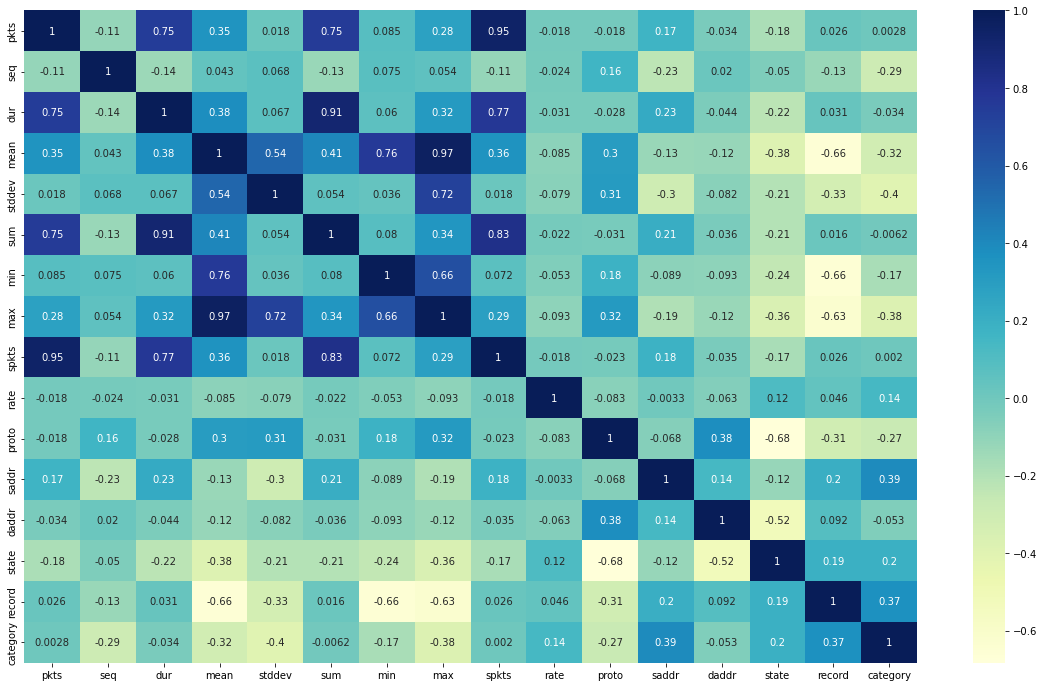

In [79]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [80]:
X=df2.drop(["category"], axis="columns")
Y=df2["category"]

## Train-Test Split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [82]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [83]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [84]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
top15_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [85]:
algorithm.append("Logistic Regression")

In [86]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [87]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [88]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [89]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [90]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

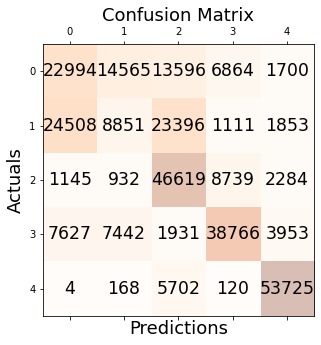

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [92]:
algorithm.append("Decision Tree")

In [93]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [94]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [95]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [96]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [97]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

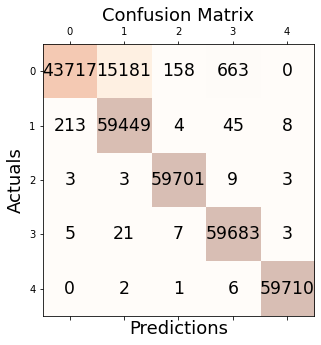

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [99]:
algorithm.append("Random Forest")

In [100]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [101]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [102]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [103]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [104]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

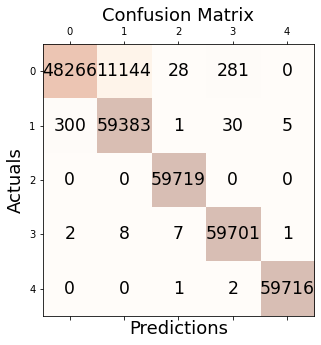

In [105]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [106]:
algorithm.append("KNN")

In [107]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [108]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [109]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [110]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [111]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

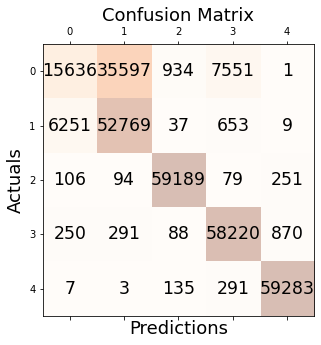

In [112]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [113]:
top15_df["Algorithms"]=algorithm
top15_df["Precision"]=precision
top15_df["Recall"]=recall
top15_df["Accuracy"]=accuracy
top15_df["F1-Score"]=f1
top15_df["Error Rate"]=error

In [114]:
top15_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.558903,0.572532,0.572532,0.537428,0.427469
1,Decision Tree,0.964489,0.945293,0.945294,0.937019,0.054706
2,Random Forest,0.974448,0.960449,0.960449,0.954621,0.039552
3,KNN,0.824261,0.820835,0.820834,0.794325,0.179166


<AxesSubplot:xlabel='Algorithms'>

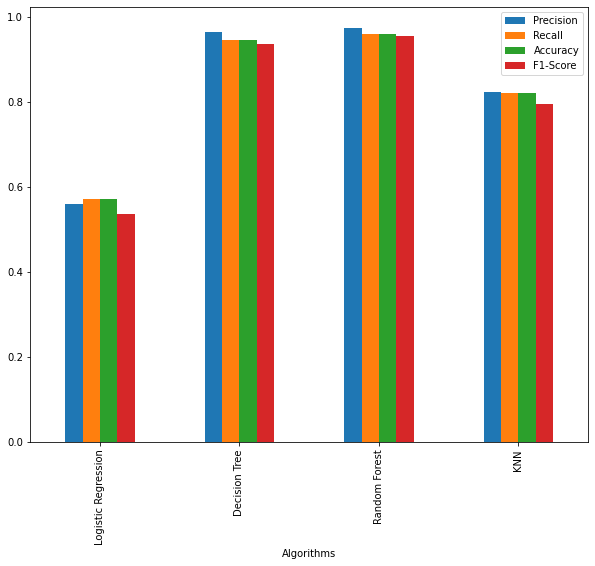

In [115]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top15_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# ANN

In [116]:
algorithm.append("ANN")

In [117]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                256       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
6532/6532 [==============================] - 5s 734us/step - loss: 0.5760 - accuracy: 0.7737
Epoch 2/10
6532/6532 [==============================] - 5s 709us/step - loss: 0.3707 - accuracy: 0.8488
Epoch 3/10
6532/6532 [==============================] - 5s 726us/step - loss: 0.3223 - accuracy: 0.8667
Epoch 4/10
6532/6532 [==============================] - 5s 709us/step - loss: 0.2967 - accuracy: 0.8746
Epoch 5/10
6532/6532 [==============================] - 5s 706us/step - loss: 0.2795 - accuracy: 0.8802
Epoch 6/10
6532/6532 [==============================] - 5s 739us/step - loss: 0.2664 - accuracy: 0.8832
Epoch 7/10
6532/6532 [==============================] - 5s 720us/step - loss: 0.2559 - accuracy: 0.88710s - loss: 0.2559 - accuracy: 0.
Epoch 8/10
6532/6532 [==============================] - 5s 711us/step - loss: 0.2448 - accuracy: 0.8919
Epoch 9/10
6532/6532 [==============================] - 5s 731us/step - loss: 0.2328 - accuracy: 0.8991
Epoch 10/10
6532/6532 [=========

In [119]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [120]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [121]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

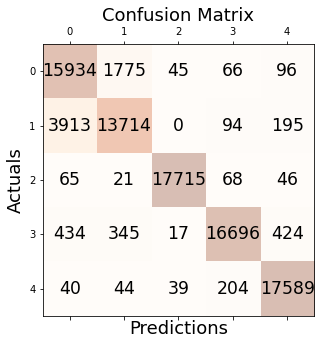

In [122]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [123]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [124]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
top15_df = pd.DataFrame(columns = column_names)

In [125]:
top15_df["Algorithms"]=algorithm
top15_df["Precision"]=precision
top15_df["Recall"]=recall
top15_df["Accuracy"]=accuracy
top15_df["F1-Score"]=f1
top15_df["Error Rate"]=error

In [126]:
top15_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.558903,0.572532,0.572532,0.537428,0.427469
1,Decision Tree,0.964489,0.945293,0.945294,0.937019,0.054706
2,Random Forest,0.974448,0.960449,0.960449,0.954621,0.039552
3,KNN,0.824261,0.820835,0.820834,0.794325,0.179166
4,ANN,0.914364,0.911464,0.911464,0.911515,0.088536


<AxesSubplot:xlabel='Algorithms'>

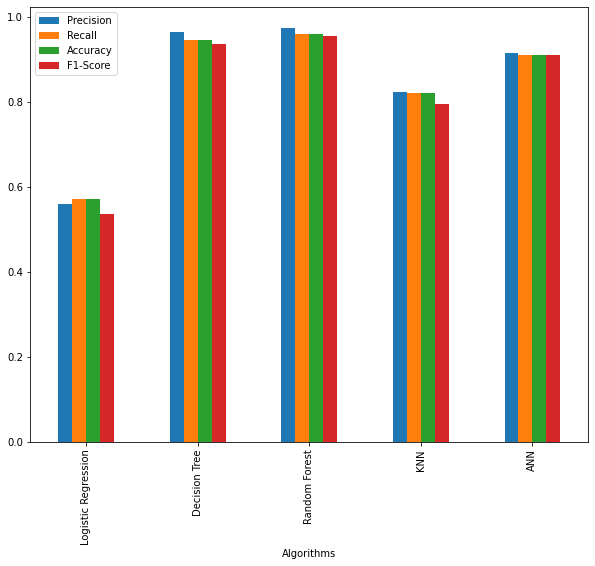

In [127]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top15_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# Considering all 21 features

## Correlation of each column

In [128]:
df.corr()

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,proto,saddr,daddr,state,record,category
pkts,1.000000,0.822202,-0.111851,0.748586,0.353378,0.018340,0.754252,0.084555,0.282214,0.945414,...,0.512179,-0.017634,-0.004962,-0.006858,-0.018465,0.171138,-0.033862,-0.178670,0.025683,0.002755
bytes,0.822202,1.000000,-0.092799,0.570334,0.282622,0.040606,0.541734,0.063230,0.233291,0.739924,...,0.815593,-0.014600,-0.004096,-0.005092,-0.018928,0.123019,-0.028525,-0.146258,0.022559,0.019161
seq,-0.111851,-0.092799,1.000000,-0.136008,0.043208,0.068365,-0.127235,0.074801,0.054493,-0.113048,...,-0.056316,-0.023574,0.014808,-0.013153,0.159633,-0.229592,0.019730,-0.049697,-0.128995,-0.289084
dur,0.748586,0.570334,-0.136008,1.000000,0.376413,0.067193,0.913190,0.060369,0.319434,0.774550,...,0.315405,-0.030975,-0.011736,-0.016905,-0.027607,0.226659,-0.043600,-0.223763,0.030886,-0.034205
mean,0.353378,0.282622,0.043208,0.376413,1.000000,0.544571,0.413612,0.761398,0.966088,0.357675,...,0.169925,-0.085187,-0.036847,-0.049991,0.303897,-0.128806,-0.123228,-0.383435,-0.659795,-0.317626
stddev,0.018340,0.040606,0.068365,0.067193,0.544571,1.000000,0.053988,0.035582,0.721666,0.018069,...,0.033608,-0.079287,-0.036252,-0.048769,0.313911,-0.297708,-0.082038,-0.208956,-0.326841,-0.400093
sum,0.754252,0.541734,-0.127235,0.913190,0.413612,0.053988,1.000000,0.079898,0.341859,0.826516,...,0.251077,-0.021952,-0.007385,-0.011606,-0.030716,0.209800,-0.035517,-0.206879,0.015933,-0.006203
min,0.084555,0.063230,0.074801,0.060369,0.761398,0.035582,0.079898,1.000000,0.657610,0.072258,...,0.044270,-0.053278,-0.023104,-0.030906,0.178952,-0.088700,-0.093396,-0.244269,-0.655908,-0.170596
max,0.282214,0.233291,0.054493,0.319434,0.966088,0.721666,0.341859,0.657610,1.000000,0.285442,...,0.141466,-0.093043,-0.040885,-0.055315,0.317715,-0.190226,-0.124491,-0.358530,-0.627769,-0.377710
spkts,0.945414,0.739924,-0.113048,0.774550,0.357675,0.018069,0.826516,0.072258,0.285442,1.000000,...,0.352228,-0.017875,-0.004981,-0.008227,-0.022676,0.180799,-0.034795,-0.174539,0.025656,0.001954


In [129]:
corr_matrix=df.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

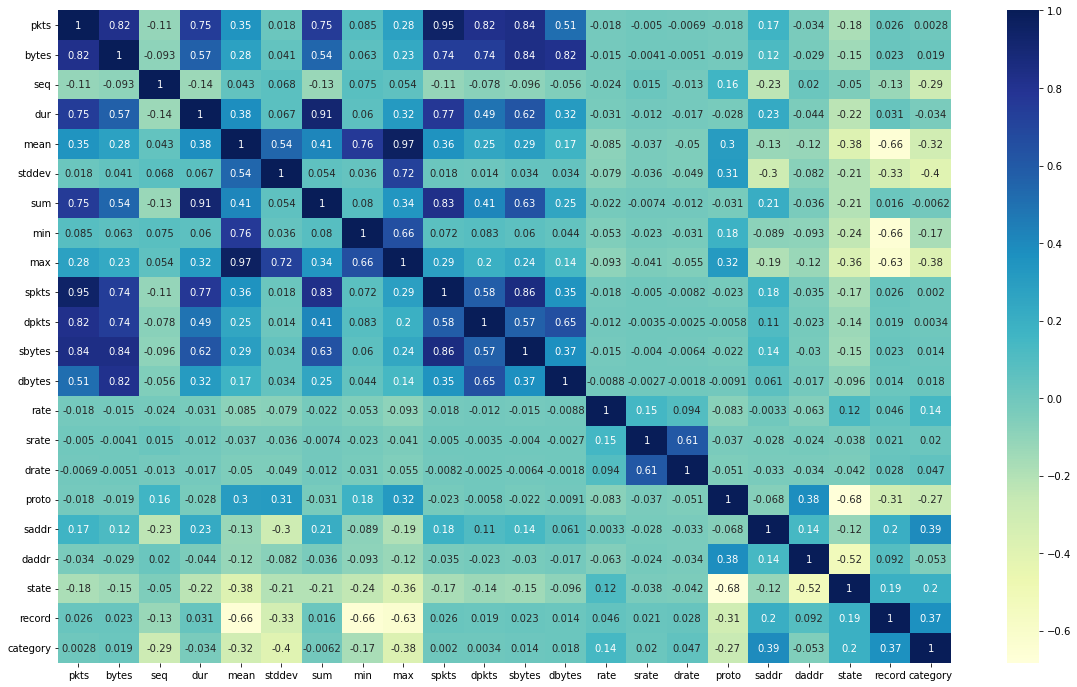

In [130]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [131]:
X=df.drop(["category"], axis="columns")
Y=df["category"]

## Train-Test Split

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [133]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [134]:
scaler_new = StandardScaler()
X = scaler_new.fit_transform(X)

In [135]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [136]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
all_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [137]:
algorithm.append("Logistic Regression")

In [138]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [139]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [140]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [141]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [142]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

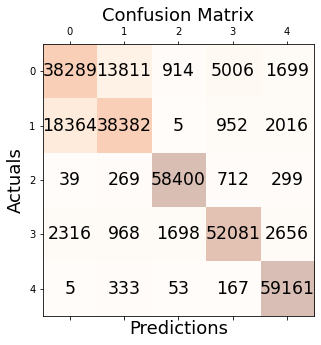

In [143]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [144]:
algorithm.append("Decision Tree")

In [145]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [146]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [147]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [148]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [149]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

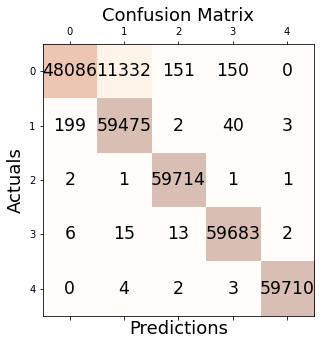

In [150]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [151]:
algorithm.append("Random Forest")

In [152]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [153]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [154]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [155]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [156]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

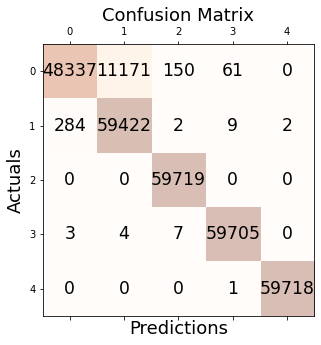

In [157]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [158]:
algorithm.append("KNN")

In [159]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [160]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [161]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [162]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [163]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

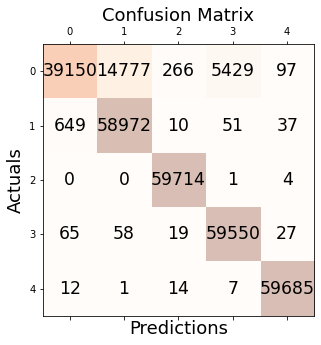

In [164]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [165]:
all_df["Algorithms"]=algorithm
all_df["Precision"]=precision
all_df["Recall"]=recall
all_df["Accuracy"]=accuracy
all_df["F1-Score"]=f1
all_df["Error Rate"]=error

In [166]:
all_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.829077,0.824909,0.824908,0.814248,0.175093
1,Decision Tree,0.974992,0.960057,0.960057,0.953279,0.039944
2,Random Forest,0.975301,0.960837,0.960837,0.954972,0.039163
3,KNN,0.946115,0.927917,0.927916,0.920364,0.072084


<AxesSubplot:xlabel='Algorithms'>

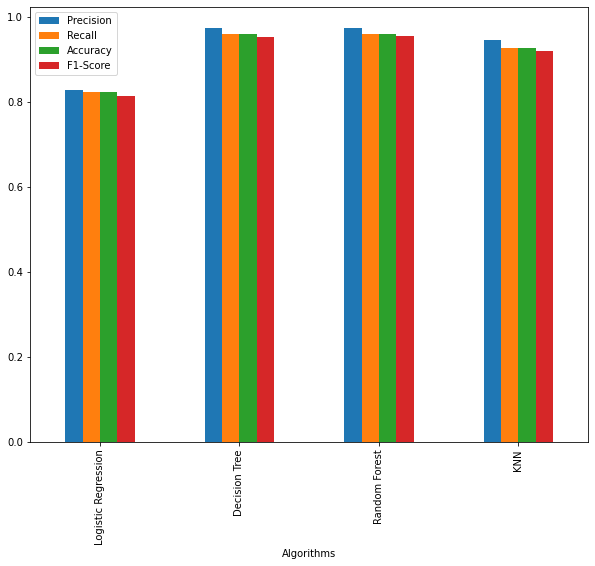

In [167]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
all_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# ANN

In [168]:
algorithm.append("ANN")

In [169]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                352       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
6532/6532 [==============================] - 5s 777us/step - loss: 0.5478 - accuracy: 0.7883
Epoch 2/10
6532/6532 [==============================] - 5s 741us/step - loss: 0.3579 - accuracy: 0.86050s
Epoch 3/10
6532/6532 [==============================] - 5s 741us/step - loss: 0.3069 - accuracy: 0.8747
Epoch 4/10
6532/6532 [==============================] - 5s 771us/step - loss: 0.2771 - accuracy: 0.8810
Epoch 5/10
6532/6532 [==============================] - 5s 741us/step - loss: 0.2562 - accuracy: 0.8875
Epoch 6/10
6532/6532 [==============================] - 5s 774us/step - loss: 0.2406 - accuracy: 0.8918
Epoch 7/10
6532/6532 [==============================] - 5s 833us/step - loss: 0.2288 - accuracy: 0.8953
Epoch 8/10
6532/6532 [==============================] - 5s 759us/step - loss: 0.2187 - accuracy: 0.9000
Epoch 9/10
6532/6532 [==============================] - 4s 686us/step - loss: 0.2100 - accuracy: 0.9031
Epoch 10/10
6532/6532 [==============================] - 4s 66

In [171]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [172]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [173]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

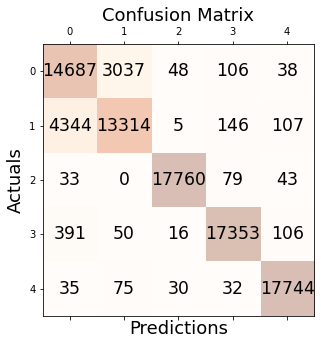

In [174]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [175]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [176]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
all_df = pd.DataFrame(columns = column_names)

In [177]:
all_df["Algorithms"]=algorithm
all_df["Precision"]=precision
all_df["Recall"]=recall
all_df["Accuracy"]=accuracy
all_df["F1-Score"]=f1
all_df["Error Rate"]=error

In [178]:
all_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.829077,0.824909,0.824908,0.814248,0.175093
1,Decision Tree,0.974992,0.960057,0.960057,0.953279,0.039944
2,Random Forest,0.975301,0.960837,0.960837,0.954972,0.039163
3,KNN,0.946115,0.927917,0.927916,0.920364,0.072084
4,ANN,0.903864,0.902646,0.902645,0.902695,0.097355


<AxesSubplot:xlabel='Algorithms'>

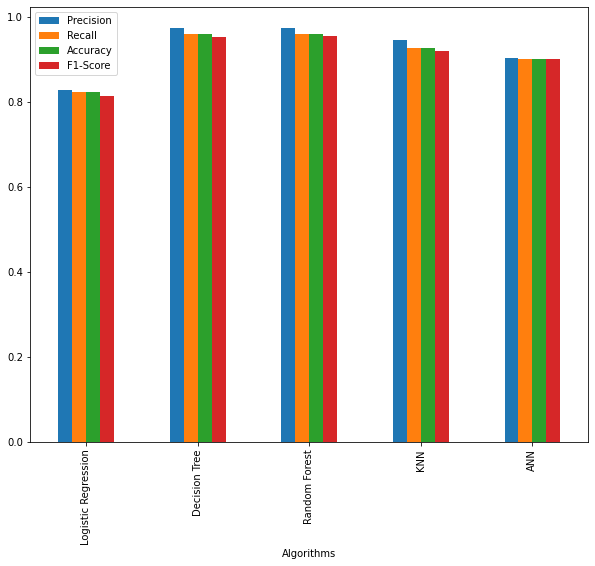

In [179]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
all_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# GridSearchCV

In [180]:
model_params = {
    'Logisitic Regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [0.1,1,10],
            'penalty':['l1','l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [2,4,6,8,10,12],

        }
    },
    
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'n_estimators': [10,100,200],
            'criterion': ['gini','entropy'],
            'max_depth': [2,4,6,8,10,12]
        }
    },

    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,6,7,8,9,10,20]
    
        } 
        
    }     
}

In [181]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=10, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ,return_train_score=True,refit="accuracy")
    clf.fit(X, Y)
    i=clf.best_index_
    scores.append({
        'Algorithms': model_name,
        'Precision': clf.cv_results_['mean_test_precision_macro'][i],
        'Recall': clf.cv_results_['mean_test_recall_macro'][i],
        'Accuracy': clf.best_score_,
        'F1-score': clf.cv_results_['mean_test_f1_macro'][i],
        'Best Parameters': clf.best_params_
    })

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedM

In [182]:
GSC_results = pd.DataFrame(scores,columns=['Algorithms','Precision', 'Recall', 'Accuracy', 'F1-score', 'Best Parameters'])
GSC_results

,Algorithms,Precision,Recall,Accuracy,F1-score,Best Parameters
0,Logisitic Regression,0.827732,0.824216,0.824215,0.813772,"{'C': 1, 'penalty': 'l2'}"
1,Decision Tree,0.970441,0.958419,0.958419,0.953582,"{'criterion': 'entropy', 'max_depth': 12}"
2,Random Forest,0.972448,0.961517,0.961517,0.956194,"{'criterion': 'entropy', 'max_depth': 12, 'n_e..."
3,KNN,0.944449,0.930177,0.930177,0.924291,{'n_neighbors': 20}


<AxesSubplot:xlabel='Algorithms'>

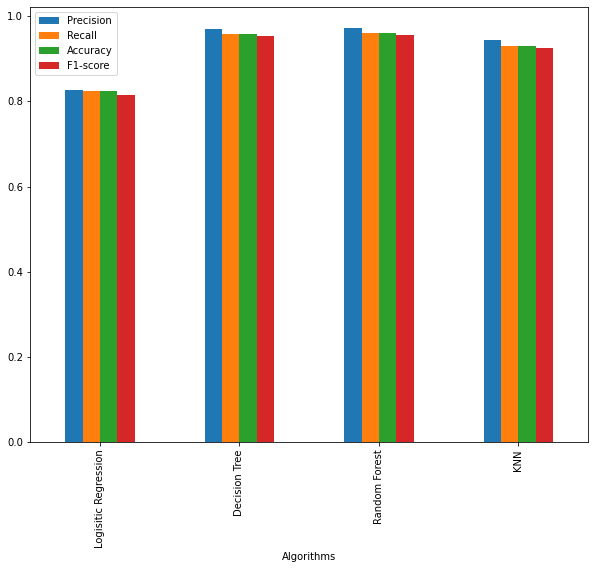

In [183]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
GSC_results.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-score"], kind="bar", ax=ax)

In [184]:
GSC_results["Best Parameters"]

0                            {'C': 1, 'penalty': 'l2'}
1            {'criterion': 'entropy', 'max_depth': 12}
2    {'criterion': 'entropy', 'max_depth': 12, 'n_e...
3                                  {'n_neighbors': 20}
Name: Best Parameters, dtype: object